# Principal Component Analysis (PCA)

In this lecture, we will cover:

1. How to interpret principle components

2. How to use it for reducing the dimension of multivariable data

## Review of PCA




Let $X = [X_1, X_2, \dots, X_n]$ be a $pxn$ matrix of observation. To be more percise, for $i\leq n$, the ith column $X_i$ is the ith observation in $\mathbb{R}^p$.

The average observation is

$$
M = \frac{1}{n} (X_1 + X_2 + \dots + X_n)
$$

This would be a point in the center of your sccater plot.

####__How PCA Constructs the Principal Components__



__Step 1: Standardization__

Let
$$
\hat{X_i} := X_i - M  \quad i = 1, 2, ..., n
$$

Then, replace the column vectores so out data is mean centerd:

$$
A:= [\hat{X_1}, \hat{X_{2}}, \dots, \hat{X_n}]
$$


__Step 2 Covariance matrix__

Sample Covariance matrix is a $pxp$ matrix


$$
S := \frac{1}{n-1} AA^T
$$

Assuming $S = [s_{ij}]$, we have

  1. $s_{jj}, \quad j = 1,\ 2,\ ..., p$ represents the variance of the j-th feature. The larger the variance, the wider the range of values in j-th feature.

  2. $s_{ij} \quad i,j = 1,\ 2,\ ..., p$ and $i\neq j$ represents the covariance of the ith and the jth feature. If $s_{ij} \geq 0$ then the two features increase or decrease together (correlated). If negative then, one increases when the other decreases.



__Step 3: Principal Components__

The eigenvectors of S are principal components.
    
  1. PCA1= the egenvector that coresponds to the largest eigenvalue.
    
  2. PCA2= the egenvector that coresponds to the second largest eigenvalue.



__Step 4 (Analysis)__

The total variance of the data is the sum of all entries on the diagonal of S:

  $$
\text{total variance} = \text{Trace}(S) = s_{11} + s_{11} + \cdots + s_{pp}
  $$
    
  1. The percentages of the total variance explained by the first component is $\frac{s_{11}}{\text{Trace}(S)}$

  2. The percentages of the total variance explained by the second component is $\frac{s_{22}}{\text{Trace}(S)}$ and so forth.


Percentage of total variance explained by PC1: 0.9420125560437582


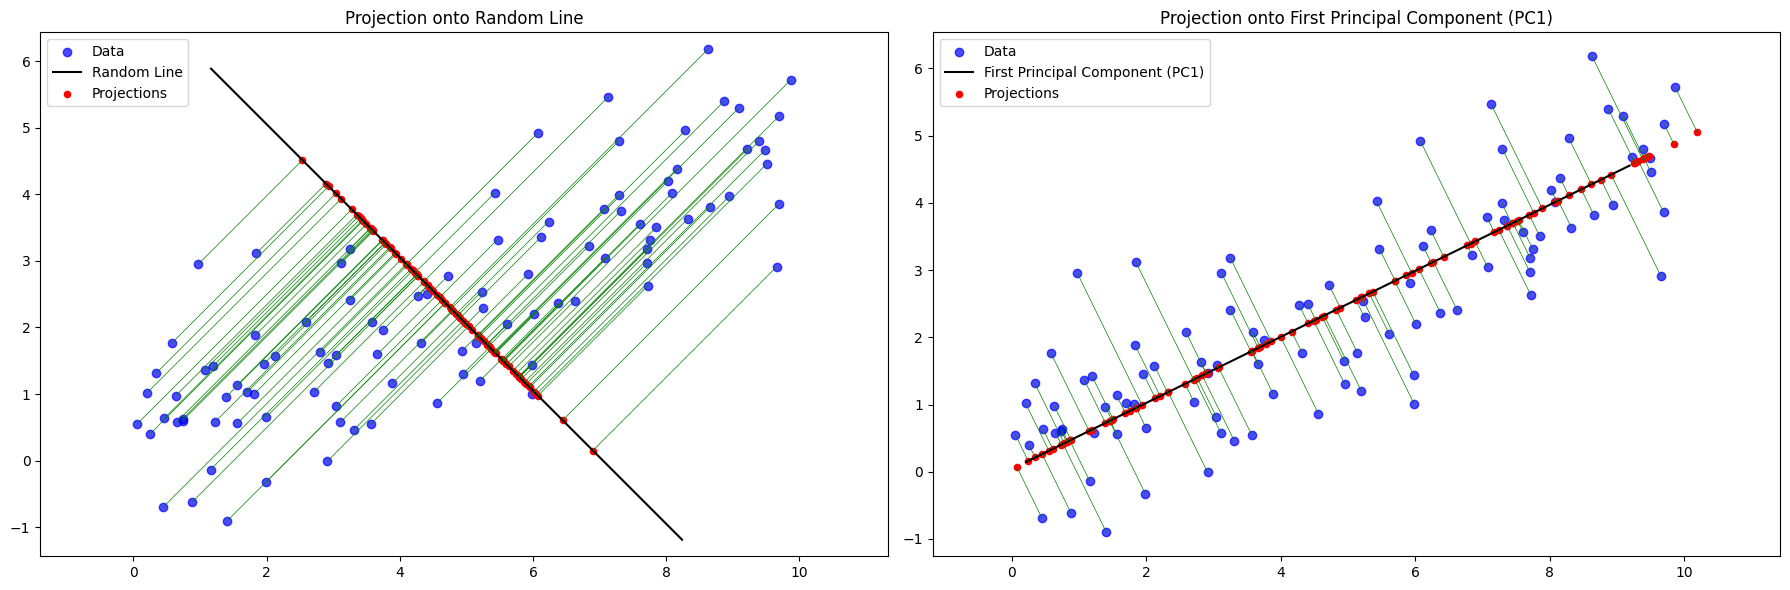

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate a weakly correlated dataset
np.random.seed(42)
x = np.random.uniform(0, 10, 100)
y = 0.5 * x + np.random.normal(0, 1, 100)  # Weak positive correlation
data = np.column_stack((x, y))

# Perform PCA
pca = PCA(n_components=2)
pca.fit(data)
pc1 = pca.components_[0]  # First principal component
pc2 = pca.components_[1]  # Second principal component
mean = np.mean(data, axis=0)

# print the percentages of the total variance explained by the first component
print("Percentage of total variance explained by PC1:", pca.explained_variance_ratio_[0])

# Define a random line for comparison
random_line = np.array([1.0, -1.0])
random_line /= np.linalg.norm(random_line)  # Normalize the line vector

# Project data onto the random line
proj_random = (data - mean) @ random_line[:, None] @ random_line[None, :] + mean

# Project data onto PC1
proj_pc1 = (data - mean) @ pc1[:, None] @ pc1[None, :] + mean

# Plot 1: Random line with projections
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], label="Data", color="blue", alpha=0.7)
plt.plot([mean[0] - 5 * random_line[0], mean[0] + 5 * random_line[0]],
         [mean[1] - 5 * random_line[1], mean[1] + 5 * random_line[1]],
         color="black", label="Random Line")
for i in range(len(data)):
    plt.plot([data[i, 0], proj_random[i, 0]], [data[i, 1], proj_random[i, 1]], color="green", linewidth=0.5)
plt.scatter(proj_random[:, 0], proj_random[:, 1], color="red", s=20, label="Projections")
plt.title("Projection onto Random Line")
plt.legend()
plt.axis("equal")

# Plot 2: PC1 with projections
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], label="Data", color="blue", alpha=0.7)
plt.plot([mean[0] - 5 * pc1[0], mean[0] + 5 * pc1[0]],
         [mean[1] - 5 * pc1[1], mean[1] + 5 * pc1[1]],
         color="black", label="First Principal Component (PC1)")
for i in range(len(data)):
    plt.plot([data[i, 0], proj_pc1[i, 0]], [data[i, 1], proj_pc1[i, 1]], color="green", linewidth=0.5)
plt.scatter(proj_pc1[:, 0], proj_pc1[:, 1], color="red", s=20, label="Projections")
plt.title("Projection onto First Principal Component (PC1)")
plt.legend()
plt.axis("equal")


plt.tight_layout()
plt.show()



## Principal Components (Another Point of View)

The **first principal component** is a linear combination of the original features, like:

$$
Z_1 = \phi_{11}X_1 + \phi_{12}X_2 + \dots + \phi_{1p}X_p
$$

The weight are

  1. chosen to capture the **maximum variance** in the data,
  2. are normalized so that their sum of squares equals 1:  
  $$
  \sum_{j=1}^p \phi_{j1}^2 = 1
  $$  



## Application: Dimension Reduction with PCA

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

It contains 1797 samples of handwritten digits, represented $8 \times 8$ images. We can think of these as vectors in $\mathbb{R}^{8 \times 8} \approx \mathbb{R}^{64}$.

Here are a few samples from the dataset.

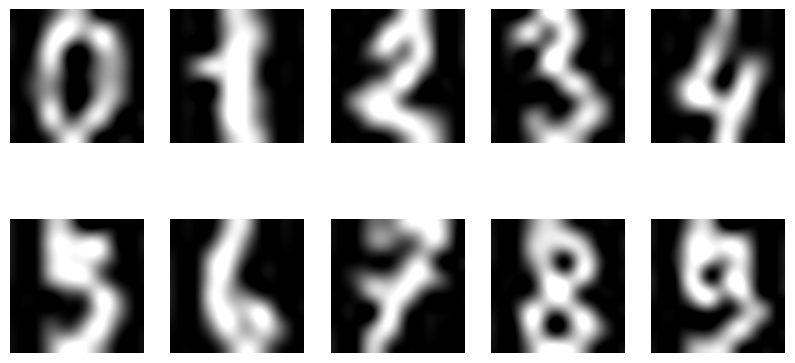

In [5]:
fig = plt.figure(figsize=(10,5))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.axis('off')
    plt.imshow(digits.images[j], cmap='gray', interpolation = 'lanczos')

plt.show()

## PCA on MNIST

Recall that our `digits.data` matrix has shape 1797 x 64 = samples x features.

Using our terminology from class, we have a dataset $$\{\vec{x}_1,\ldots,\vec{x}_{1797}\},$$ where each $\vec{x}_i \in \mathbb{R}^{64}$. This is recorded as the "data matrix"
$$
X = \begin{pmatrix}
\vec{x}_1^T \\
\vec{x}_2^T \\
\cdots \\
\vec{x}_{1797}^T \end{pmatrix},
$$
where the superscript $T$ indicatest the *transpose* operation, turning a column vector into a row vector.

We can apply PCA to this data matrix.

In [6]:
from sklearn.decomposition import PCA

pca = PCA() # Initialize the model
pca.fit(digits.data) # fit the model to our data matrix

PCA()

In [7]:
print(pca.components_.shape)
print("PC1 = ", pca.components_[0,:])

(64, 64)
PC1 =  [ 0.00000000e+00 -1.73094651e-02 -2.23428835e-01 -1.35913304e-01
 -3.30323092e-02 -9.66340844e-02 -8.32943805e-03  2.26900082e-03
 -3.20516495e-04 -1.19308905e-01 -2.44451676e-01  1.48512745e-01
 -4.67319410e-02 -2.17740744e-01 -1.48136776e-02  4.47779518e-03
 -4.94136398e-05 -7.95419375e-02  8.33951454e-02  2.15915342e-01
 -1.72126801e-01 -1.63712098e-01  2.86444452e-02  4.23251803e-03
  9.85488574e-05  6.42319144e-02  2.54093316e-01 -3.56771026e-02
 -2.09462569e-01 -4.31311420e-02  5.13118688e-02  2.13422732e-04
  0.00000000e+00  1.59950883e-01  3.68690774e-01  1.64406827e-01
  8.52007908e-02  3.72982855e-02  2.15866980e-02  0.00000000e+00
  1.28865585e-03  1.06945287e-01  3.03067457e-01  2.47813041e-01
  2.09637296e-01  1.22325219e-02 -3.69458497e-02  1.61485028e-03
  6.93023548e-04 -8.35144239e-03 -5.58598986e-02  9.30534169e-02
  1.07387720e-01 -1.37734565e-01 -6.32879466e-02  9.61671077e-04
  9.55079131e-06 -1.40786840e-02 -2.35675488e-01 -1.41225588e-01
 -9.15964

`pca.components_` is a ndarray of shape (n_components, n_features). In our case, a 64x64 matrix where each row represents a component and each column represents a feature.


Given the PCA basis $\{\vec{v}_1,\ldots,\vec{v}_{64}\}$, we can project a vector $\vec{x} \in \mathbb{R}^{64}$ onto the 2-dimensional subspace spanned by $\vec{v}_1,\vec{v}_2$ via the map

$$
\vec{x} \mapsto \left[\begin{matrix} \vec{x}. \vec{v}_1  \\ \vec{x}.\vec{v}_2  \end{matrix}\right]
$$


Since this subspace is 2-dimensional, we can visualize the results!

In [9]:
pVec0 = pca.components_[0]
pVec1 = pca.components_[1]

import numpy as np

projectedMNIST = []

# Now we linearly project every sample in our dataset onto the two-dimensional subspace spanned by the first
# two singular vectors
for j in range(1797):
    projectedMNIST.append([np.dot(digits.data[j],pVec0),np.dot(digits.data[j],pVec1)])

projectedMNIST = np.array(projectedMNIST)

The figure below shows our 64-dimensional data, projected onto our 2-dimensional PCA subspace. The dots are colored by their 'class' (i.e., which digit is drawn, 0,1,...,9).

<ipython-input-10-cbef9a7e0d44>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral_r', 10))


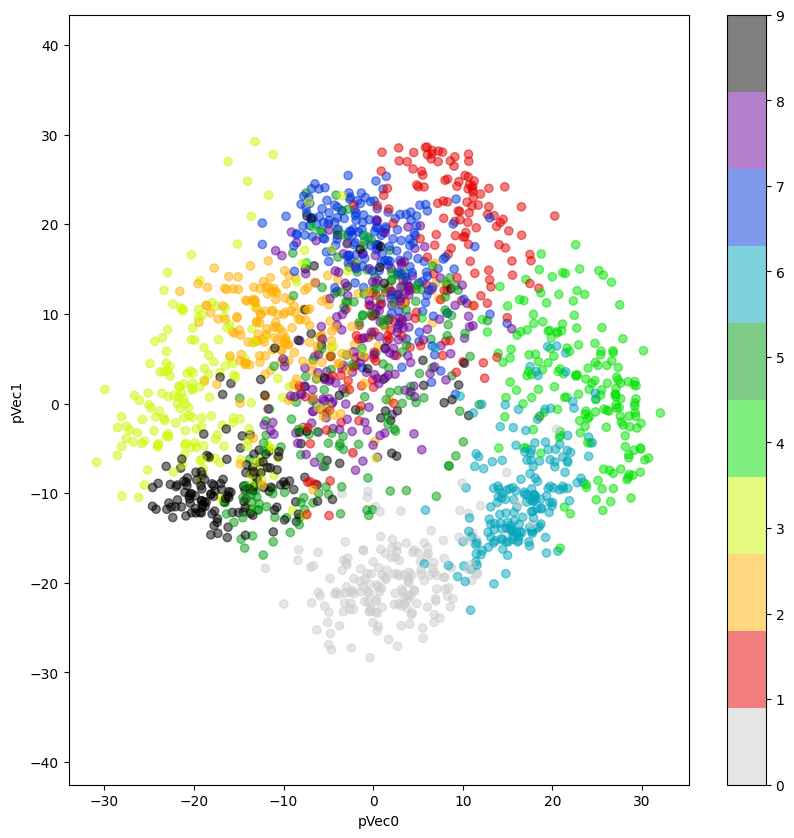

In [10]:
plt.figure(figsize=(10,10))

plt.scatter(projectedMNIST[:, 0], projectedMNIST[:, 1],
            c=digits.target, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

plt.xlabel('pVec0')
plt.ylabel('pVec1')
plt.axis('equal')
plt.colorbar();

To read the above figure, let's visualize our principal vectors--we just need to reshape the 64-dimensional vectors into 8x8 images.

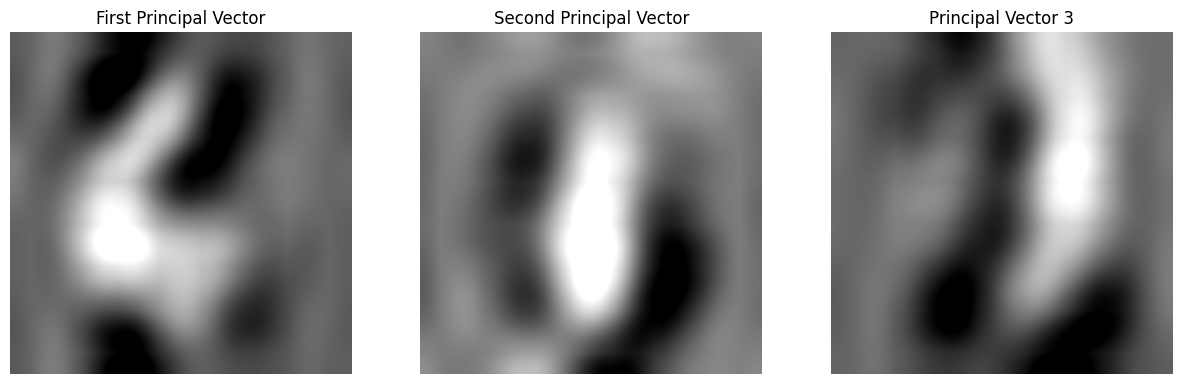

In [11]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.imshow(pVec0.reshape(8,8),cmap='gray', interpolation = 'sinc')
plt.axis('off')
plt.title('First Principal Vector')

plt.subplot(1,3,2)
plt.imshow(pVec1.reshape(8,8),cmap='gray', interpolation = 'sinc')
plt.axis('off')
plt.title('Second Principal Vector')

k = 2
plt.subplot(1,3,3)
plt.imshow(pca.components_[k].reshape(8,8),cmap='gray', interpolation = 'sinc')
plt.axis('off')
plt.title('Principal Vector '+str(k+1))

plt.show()

We see that the first principal vector seems sensitive to picking out shapes that look like '4', while the second is sensitive to shapes that look like '0'. This is confirmed by the scatter plot.

Moreover, looking at the negative PC1 direction, it seems that '3' is the "least '4'-like" digit. The PC2 direction shows that '1' is the "least '0'-like" digit.

As we increas $k$, the $k$th principal vector becomes less and less interpretable to human eyes.

Typically, the first few principal vectors capture the majority of the variability in the data.

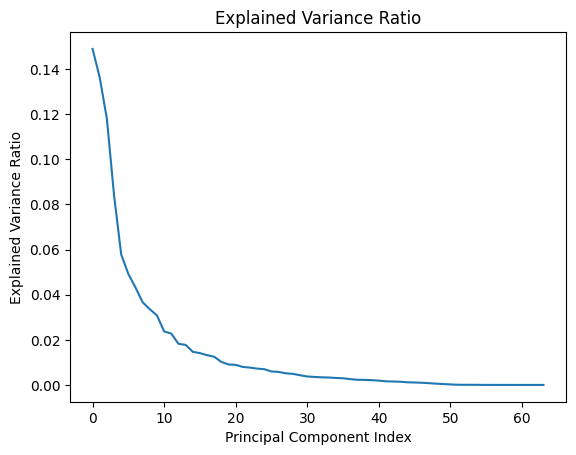

In [13]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)

# Add title
plt.title('Explained Variance Ratio')

# Label the x-axis and y-axis
plt.xlabel('Principal Component Index')  # x-axis label
plt.ylabel('Explained Variance Ratio')  # y-axis label

# Show the plot
plt.show()


This shows that the first few principal vectors are really doing the heavy lifting in representing the data.

## Your Turn! Apply PCA to iris data set


In [14]:
# load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [57]:
# iris Shape (## Read this as a collection of vectors)

In [58]:
# Initialize the model

# fit the model to our data matrix


In [59]:
#print PCA component shapes



In [61]:
# print the PC1


In [62]:
# linearly project every sample in our dataset onto the two-dimensional subspace spanned by the first
# two singular vectors


In [63]:
# plot the above two-dimensional subspace


In [64]:
#print the explained variance ratio


In [65]:
#Plot the explained variance ratio


In [66]:
#linearly project every sample in our dataset onto the three-dimensional subspace spanned by the first
# three singular vectors

In [55]:
# Create an interactive 3D scatter plot
import plotly.express as px

fig = px.scatter_3d(x=projectedIRIS_3D[:, 0],
                    y=projectedIRIS_3D[:, 1],
                    z=projectedIRIS_3D[:, 2],
                    color=iris.target.astype(str),  # Color by species (target)
                    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
                    title="3D Projection of Iris Dataset onto First Three Principal Components")

fig.update_traces(marker=dict(size=3, opacity=0.7))  # Adjust opacity along with size

# Show the plot
fig.show()

### References:

1.  [Introduction to Statistical Learning with Python](https://hastie.su.domains/ISLP/ISLP_website.pdf.download.html)

2. **Linear Algebra and Its Applications, 5th Edition** by David C. Lay  

3. **GitHub Repository: Math for Data Science (Fall 2024)**  
   [MathForDataScience-Fall24](https://github.com/trneedham/MathForDataScience-Fall24)
